<a href="https://colab.research.google.com/github/kh9yaz/124Rus/blob/master/ITOI_lab_5_03_04_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Задание 5. Линейная регрессия</h1>

МИЗ24-01

Ефимов Константин Алексеевич

Задание 5. Линейная регрессия

# Импорт необходимых пакетов

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Пример искуственной тестовой задачи

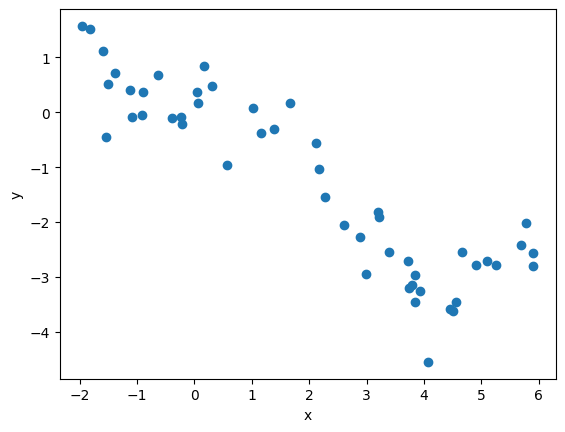

In [3]:
# сгенерируем данные
volume = 50
x = np.random.uniform(-2,6, volume)
y = 0.1*x**2 - x + np.sin(x) + np.random.normal(0,0.5,volume)

# визуализация
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [4]:
# сохраним в датафрейм
data = pd.DataFrame({'x':x, 'y':y})
data.head(3)

,x,y
0,-0.905085,0.360503
1,4.656149,-2.538886
2,3.390583,-2.552003


In [5]:
data.describe()

,x,y
count,50.000000,50.000000
mean,1.991144,-1.297212
std,2.475835,1.642272
min,-1.954612,-4.547097
25%,-0.224764,-2.762214
50%,2.221898,-1.287422
75%,3.906267,0.142582
max,5.903733,1.572600


График `scatter plot` с линейной аппроксимацией

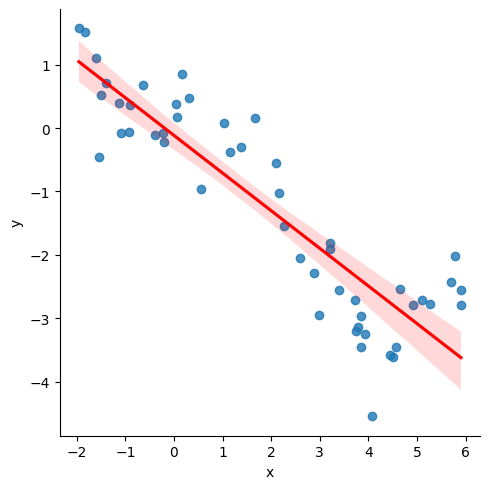

In [6]:
sns.lmplot(data = data, x ="x", y ="y", line_kws={"color": "red"})
plt.show()

Если в данных есть выбросы, то можно их отфильтровать: `robust=True`

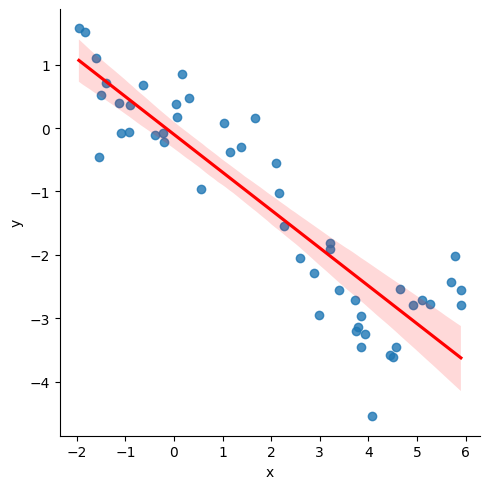

In [7]:
sns.lmplot(data = data, x ="x", y ="y", robust=True, line_kws={"color": "red"})
plt.show()

Разделим данные обучающие и тестовые, построим модель линейной регрессии и оценим все основные матрики качества.

In [8]:
train, test = train_test_split(data, test_size = 0.25)

In [9]:
# обучим модель, оценим качество по R2
regr = LinearRegression()
regr.fit(train['x'].array.reshape(-1, 1), train['y'].array.reshape(-1, 1))

LinearRegression()

In [10]:
# оценки R2, MSE и MAE на обучающих данных
pred_train = regr.predict(train['x'].array.reshape(-1, 1))
print('R2 =', regr.score(train['x'].array.reshape(-1, 1), train['y'].array.reshape(-1, 1)))
print('MSE = ', mean_squared_error(pred_train, train['y'].array.reshape(-1, 1)))
print('MAE = ', mean_absolute_error(pred_train, train['y'].array.reshape(-1, 1)))

R2 = 0.7727155369530241
MSE =  0.54557443218048
MAE =  0.5884768110827057


In [11]:
print("Regression expression:")
print("y = (", regr.coef_[0][0], ') * x +(', regr.intercept_[0],')')

Regression expression:
y = ( -0.5796497548579749 ) * x +( -0.15896847122504698 )


In [12]:
# сделаем прогноз на тестовых данных
pred = regr.predict(test['x'].array.reshape(-1, 1))

In [13]:
# оценки R2, MSE и MAE на тестовых данных
print('R2 =', regr.score(test['x'].array.reshape(-1, 1), test['y'].array.reshape(-1, 1)))
print('MSE = ', mean_squared_error(pred, test['y'].array.reshape(-1, 1)))
print('MAE = ', mean_absolute_error(pred, test['y'].array.reshape(-1, 1)))

R2 = 0.8522682301057641
MSE =  0.4695738661592186
MAE =  0.6351035479447542


Итоговый график модели

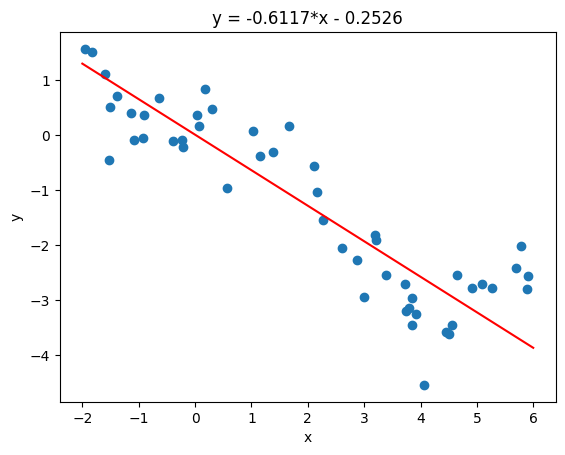

In [14]:
x_regr = np.linspace(-2,6, 2)
y_regr = ( -0.6469841560093544 ) * x_regr +( 0.010891707919341131 )
fig, ax = plt.subplots()
ax.scatter(x, y, label = 'data')
ax.plot(x_regr, y_regr, color = 'red', label = 'regression')
ax.set_title('y = -0.6117*x - 0.2526')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# Импорт данных прикладной задачи

Набор данных *Combined Cycle Power Plant Data Set* (Набор данных электростанции комбинированного цикла)

http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

Данные состоят из среднечасовых переменных окружающей среды.
- Температура (Т) в пределах от 1,81°С до 37,11°С,
- Давление окружающей среды (АР) в диапазоне 992,89-1033,30 мбар,
- Относительная влажность (RH) в диапазоне от 25,56% до 100,16%
- Вакуум на выхлопе (V) в диапазоне 25,36-81,56 см рт.ст.

Целевая переменная:
- Полезный часовой отпуск электроэнергии (ЭЭ) 420,26-495,76 МВт

In [15]:
# импорт данных, по ссылке - архив zip
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

resp = urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip')
myzip = ZipFile(BytesIO(resp.read()))
myzip.namelist()

['CCPP/',
 'CCPP/Folds5x2_pp.ods',
 'CCPP/Folds5x2_pp.xlsx',
 'CCPP/Readme.txt',
 'CCPP/Readme.txt~']

In [16]:
data = pd.read_excel(myzip.open('CCPP/Folds5x2_pp.xlsx'))
data.head(3)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


Задание:

1. Проверьте, есть ли пропуски в данных (pandas функция `info()`).
2. Выберите 1 независимую переменную для построения линейной модели. Для этого найдите переменную, у которой связь с целевой переменной больше похожа на линейную. для это можно найти пару с наибольшей корреляцией (pandas функция `corr()`).
3. Подтвердите выбор визуализацией парных графиков (`pairplot` в seaborn).
4. Покажите график данные+линейная регресия (`lmplot` в seaborn)
5. Постройте линейную модель.
6. Покажите итоговую формулу с коэффициентами.
7. Оценитие R2, MSE и MAE.

In [ ]:
# TO DO

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB

Наиболее коррелирующая переменная: AT (корреляция = 0.9481)


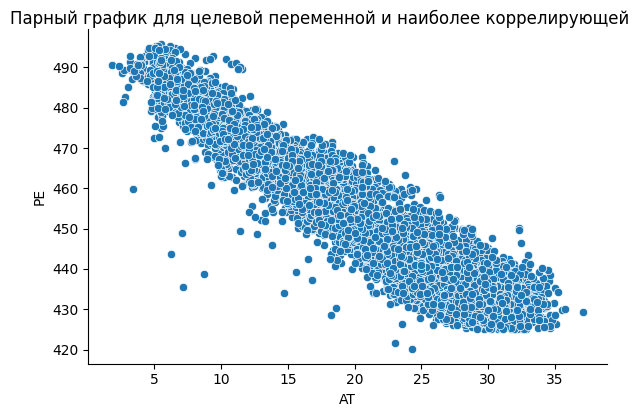

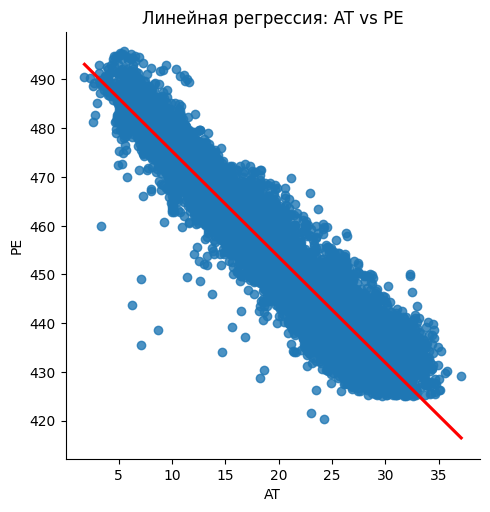


Уравнение регрессии: PE = (-2.1787) * AT + (497.1931)

Метрики качества модели:
R2 (train): 0.8990
MSE (train): 29.4305
MAE (train): 4.2895
R2 (test): 0.8987
MSE (test): 29.4481
MAE (test): 4.2745


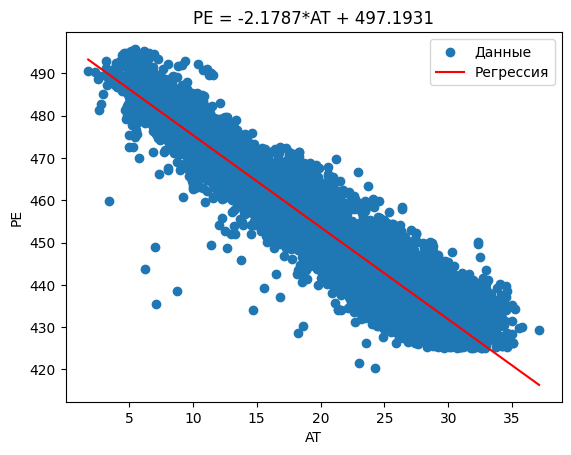

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Загрузка данных
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

resp = urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip')
myzip = ZipFile(BytesIO(resp.read()))
data = pd.read_excel(myzip.open('CCPP/Folds5x2_pp.xlsx'))

# 1. Проверка пропусков
print("Информация о данных:")
data.info()

# 2. Выбор переменной с наибольшей корреляцией
correlation = data.corr()['PE'].abs().sort_values(ascending=False)
most_correlated_var = correlation.index[1]  # Первый после PE
print(f"\nНаиболее коррелирующая переменная: {most_correlated_var} (корреляция = {correlation.iloc[1]:.4f})")

# 3. Визуализация парных графиков
sns.pairplot(data, x_vars=[most_correlated_var], y_vars=['PE'], height=4, aspect=1.5)
plt.suptitle('Парный график для целевой переменной и наиболее коррелирующей', y=1.02)
plt.show()

# График данных с линейной регрессией
sns.lmplot(data=data, x=most_correlated_var, y='PE', line_kws={"color": "red"})
plt.title(f'Линейная регрессия: {most_correlated_var} vs PE')
plt.show()

# 4. Построение модели
X = data[[most_correlated_var]]
y = data['PE']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Уравнение регрессии
print(f"\nУравнение регрессии: PE = ({model.coef_[0]:.4f}) * {most_correlated_var} + ({model.intercept_:.4f})")

# 6. Оценка качества модели
def evaluate(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    metrics = {
        'R2 (train)': model.score(X_train, y_train),
        'MSE (train)': mean_squared_error(y_train, train_pred),
        'MAE (train)': mean_absolute_error(y_train, train_pred),
        'R2 (test)': model.score(X_test, y_test),
        'MSE (test)': mean_squared_error(y_test, test_pred),
        'MAE (test)': mean_absolute_error(y_test, test_pred)
    }
    return metrics

metrics = evaluate(model, X_train, y_train, X_test, y_test)
print("\nМетрики качества модели:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# 7. Визуализация итоговой регрессии
x_vals = np.linspace(data[most_correlated_var].min(), data[most_correlated_var].max(), 100)
y_vals = model.coef_[0] * x_vals + model.intercept_

plt.scatter(data[most_correlated_var], data['PE'], label='Данные')
plt.plot(x_vals, y_vals, color='red', label='Регрессия')
plt.xlabel(most_correlated_var)
plt.ylabel('PE')
plt.title(f'PE = {model.coef_[0]:.4f}*{most_correlated_var} + {model.intercept_:.4f}')
plt.legend()
plt.show()